In [8]:
import numpy as np
import sys
sys.path.insert(1,'C:/Users/LOFT_Olaf/Desktop/poke/') # One day I'll actually package poke!
import poke.poke_core as pol
from astropy.io import fits
import astropy.units as u
# import poppy
import matplotlib.pyplot as plt

In [23]:
def LoadJonesAndMueller(pth):
    
    jones_pupil = fits.open(pth)[0].data
    
    # Reclaim the complex numbers from the fits file ;-;
    J11 = jones_pupil[:,:,0,0,0] + 1j*jones_pupil[:,:,0,0,1]
    J12 = jones_pupil[:,:,0,1,0] + 1j*jones_pupil[:,:,0,1,1]

    J21 = jones_pupil[:,:,1,0,0] + 1j*jones_pupil[:,:,1,0,1] 
    J22 = jones_pupil[:,:,1,1,0] + 1j*jones_pupil[:,:,1,1,1] 

    # Get Mueller Matrix
    M = np.empty([4,4,J11.shape[0],J11.shape[1]],dtype='float64')
    for i in range(J11.shape[0]):
        for j in range(J11.shape[1]):

            J = np.array([[J11[i,j],J12[i,j]],
                          [J21[i,j],J22[i,j]]])
            M[:,:,i,j] = np.real(pol.JonesToMueller(J))
            
    J = np.array([[J11,J12],[J21,J22]])
            
    return J,M

In [34]:
# Let's make pretty plots with Imagegrid
# Time to make a Mueller Pupil
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable
import numpy as np

def PlotJonesPupil(J,wlband):
    titlist = ['|J00|','|J01|','Arg{J00}','Arg{J01}',
               '|J10|','|J11|','Arg{J10}','Arg{J11}']
    
    k = 0

    fig = plt.figure(figsize=[14,7])
    plt.suptitle('Jones Pupil of ELT in '+wlband+' band')
    grid = ImageGrid(fig,111,
                     nrows_ncols=(2,4),
                     axes_pad=0.6,
                    cbar_location="right",
                    cbar_mode='each',
                    direction = 'row',
                    cbar_size="5%",
                    cbar_pad=0.2)

    indx = -1

    for ax, im in zip(grid,[np.abs(J[0,0,:,:]),np.abs(J[0,1,:,:]),np.angle(J[0,0,:,:]),np.angle(J[0,1,:,:]),
                            np.abs(J[1,0,:,:]),np.abs(J[1,1,:,:]),np.angle(J[1,0,:,:]),np.angle(J[1,1,:,:])]):
        img = ax.imshow(im,cmap='magma')
        ax.cax.colorbar(img)
        ax.set_title(titlist[k])
        k += 1
    #     divider = make_axes_locatable(ax)
    #     cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.subplots_adjust()
    plt.show

def PlotMuellerPupil(M,wlband):
    titlist = ['M00','M01','M02','M03',
               'M10','M11','M12','M13',
               'M20','M21','M22','M23',
               'M30','M31','M32','M33']

    k = 0

    fig = plt.figure(figsize=[14,14])
    plt.suptitle('Mueller Pupil of ELT in '+wlband+' band')
    grid = ImageGrid(fig,111,
                     nrows_ncols=(4,4),
                     axes_pad=0.8,
                    cbar_location="right",
                    cbar_mode='each',
                    direction = 'row',
                    cbar_size="5%",
                    cbar_pad=0.2)

    indx = -1

    for ax, im in zip(grid,[M[0,0,:,:],M[0,1,:,:],M[0,2,:,:],M[0,3,:,:],
                            M[1,0,:,:],M[1,1,:,:],M[1,2,:,:],M[1,3,:,:],
                            M[2,0,:,:],M[2,1,:,:],M[2,2,:,:],M[2,3,:,:],
                            M[3,0,:,:],M[3,1,:,:],M[3,2,:,:],M[3,3,:,:]]):
        img = ax.imshow(im,cmap='magma')
        ax.cax.colorbar(img)
        ax.set_title(titlist[k])
        k += 1
    #     divider = make_axes_locatable(ax)
    #     cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.subplots_adjust()
    plt.show

# B Band (445nm)

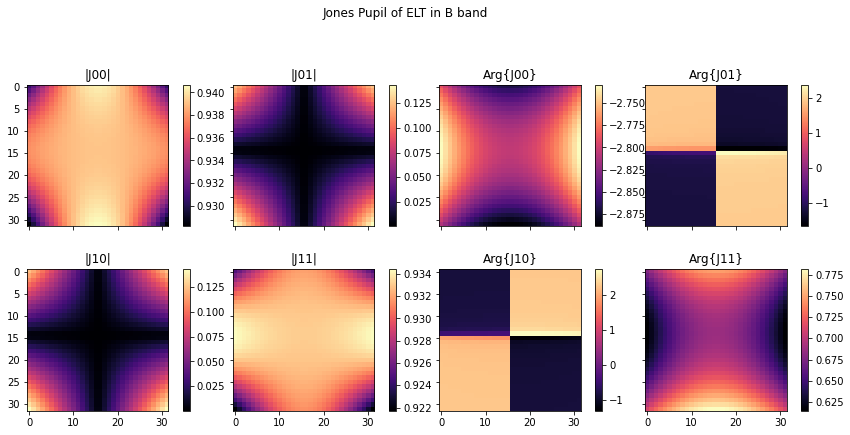

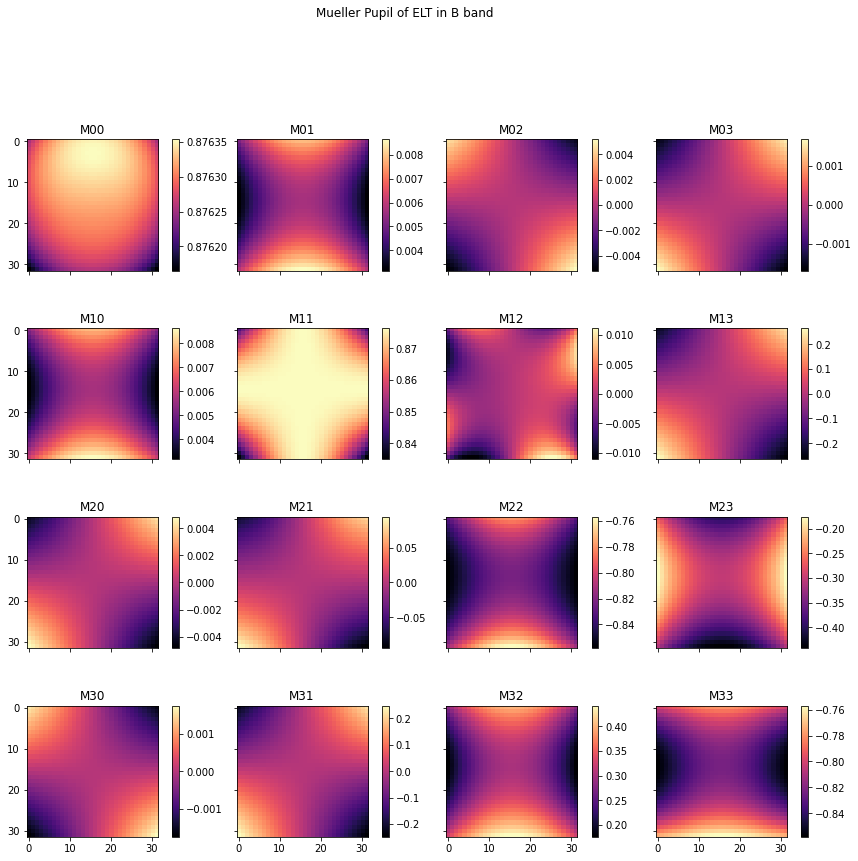

In [36]:
pth = 'ELT_BareAg_445.fits'
J,M = LoadJonesAndMueller(pth)
PlotJonesPupil(J,'B')
PlotMuellerPupil(M,'B')

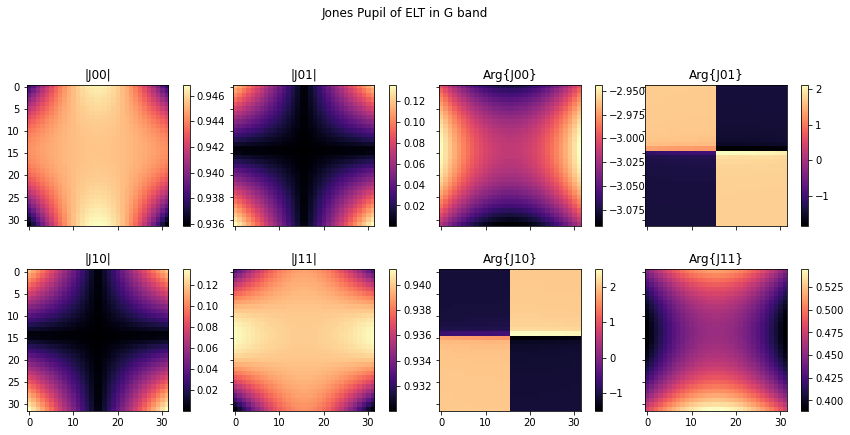

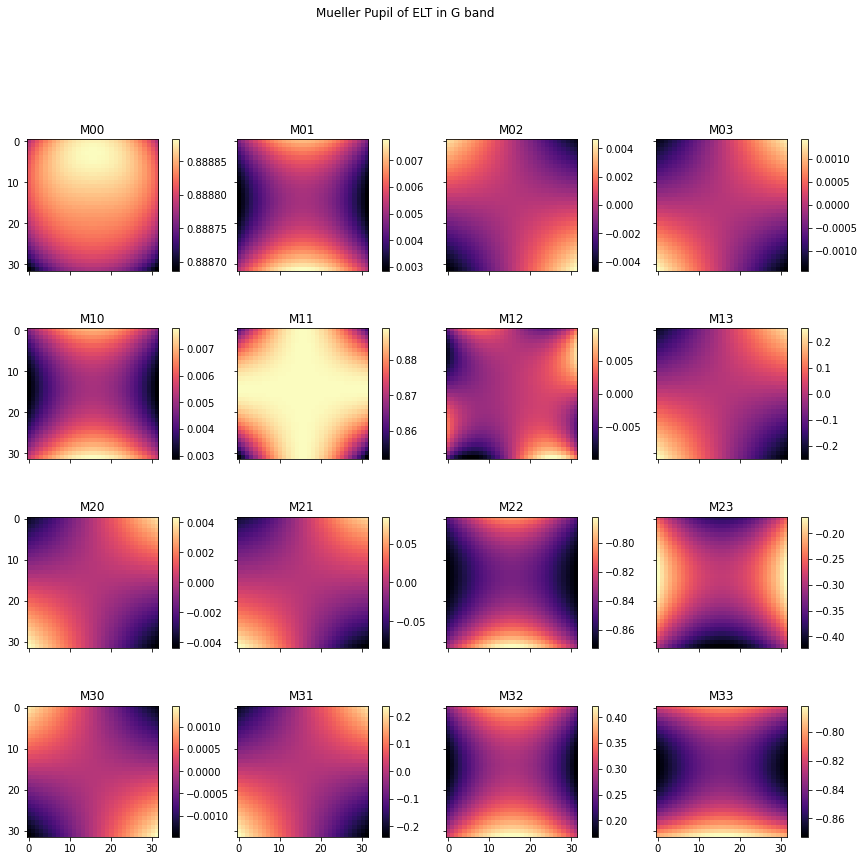

In [37]:
pth = 'ELT_BareAg_464.fits'
J,M = LoadJonesAndMueller(pth)
PlotJonesPupil(J,'G')
PlotMuellerPupil(M,'G')

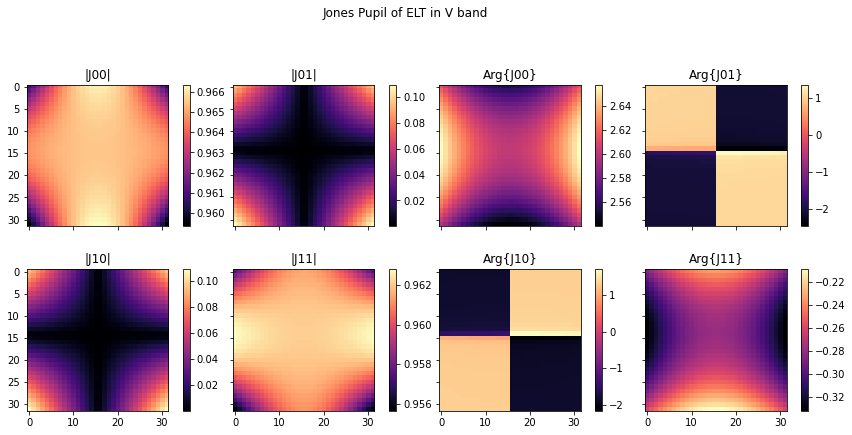

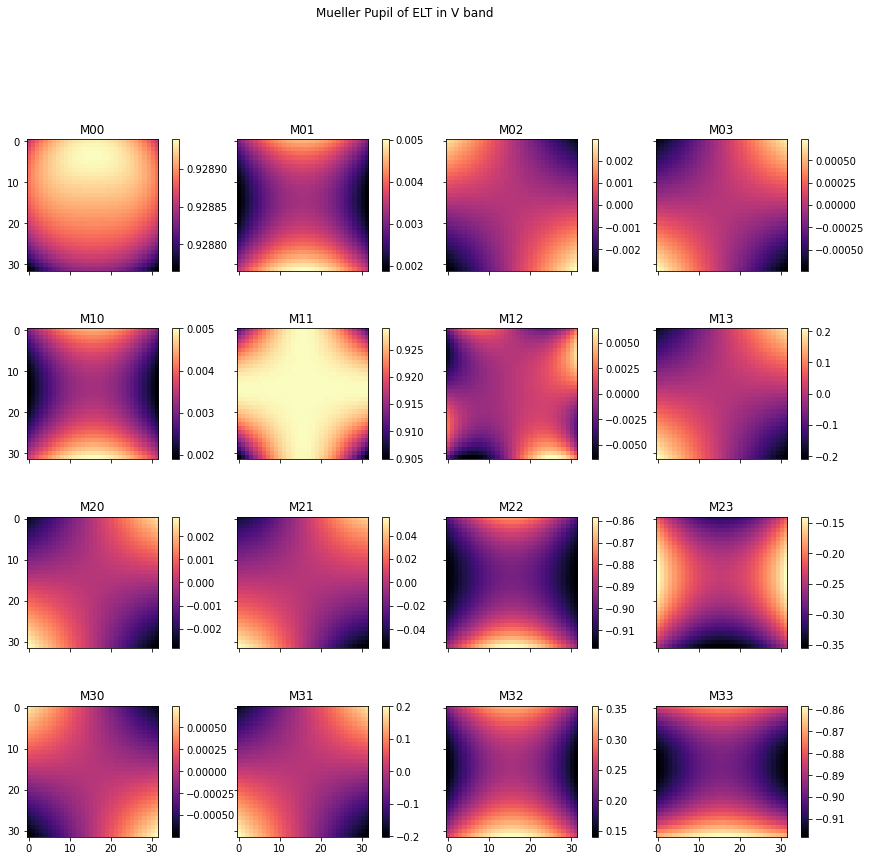

In [38]:
pth = 'ELT_BareAg_551.fits'
J,M = LoadJonesAndMueller(pth)
PlotJonesPupil(J,'V')
PlotMuellerPupil(M,'V')

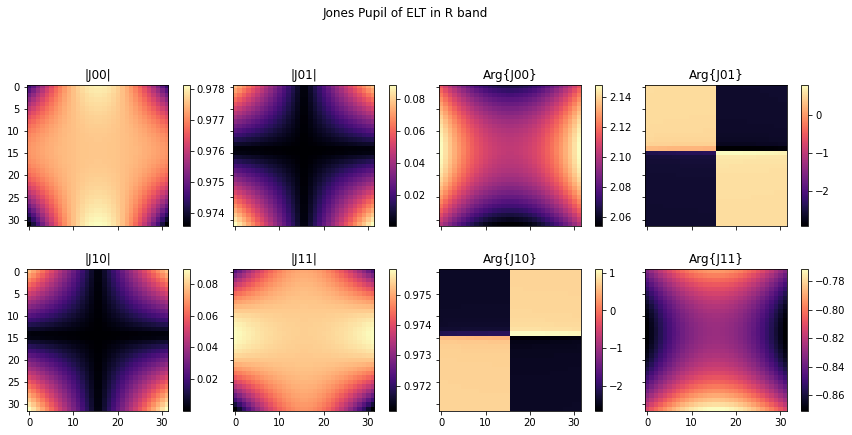

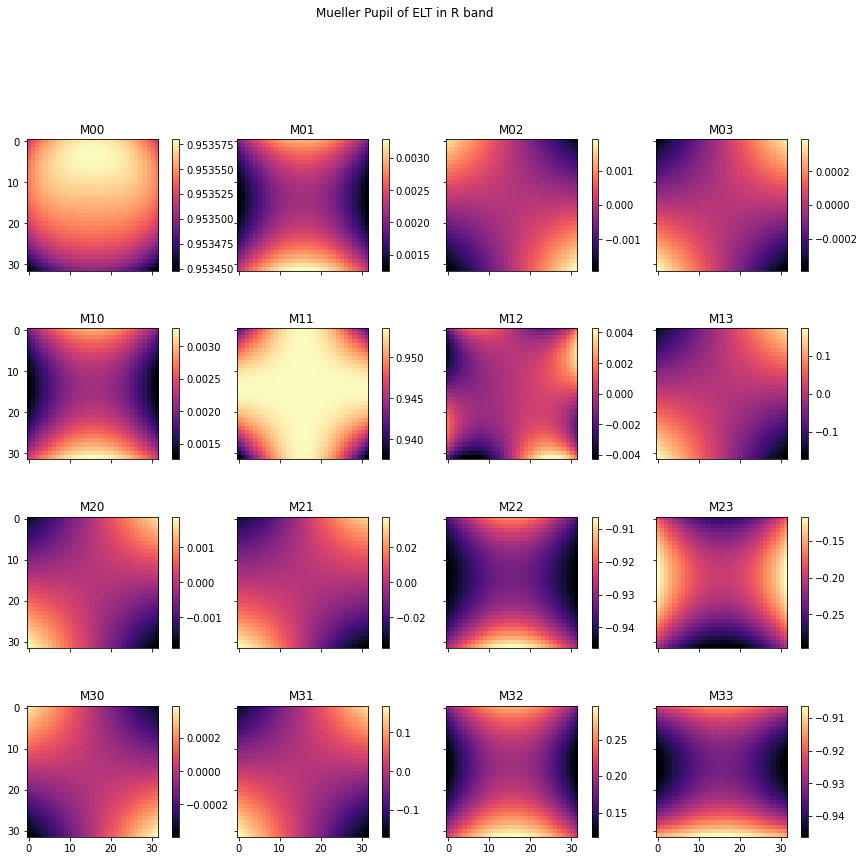

In [39]:
pth = 'ELT_BareAg_658.fits'
J,M = LoadJonesAndMueller(pth)
PlotJonesPupil(J,'R')
PlotMuellerPupil(M,'R')